In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [21]:
'''choose environment'''
#env_name = 'MountainCar-v0'
env_name = 'Acrobot-v1'
#env_name = 'LunarLander-v2'

if env_name == 'LunarLander-v2':
    training_method = ['eps_greedy', 'greedy',
                       'Goal Bonus RS', 'Mix In Random', 'Dynamic PBRS', 'ICM']
else:
    training_method = ['eps_greedy', 'greedy', 'Goal Bonus RS',
                       'Mix In Random', 'Dynamic PBRS', 'PBRS', 'ICM']

In [22]:
fig_width = 10
fig_height = 6

window_len_smooth = 20
min_window_len_smooth = 1
linewidth_smooth = 1.5
alpha_smooth = 1

window_len_var = 8
min_window_len_var = 1
linewidth_var = 2
alpha_var = 0.2

fig_num = 0
data_to_plot = []

colors = ['red', 'blue', 'green', 'orange', 'purple', 'olive', 'chocolate', 'crimson',
          'black', 'brown']


In [23]:
log_dir = "../storage/DQN_logs" + '/' + env_name

# make directory for saving figures
figures_dir = "../storage/DQN_comparison_plots"
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)

# make environment directory for saving figures
figures_dir = figures_dir + '/' + env_name + '/'
if not os.path.exists(figures_dir):
    os.makedirs(figures_dir)



In [24]:
for i in training_method:
    if i == 'eps_greedy':
        method = '_epsilon_greedy'
    elif i == 'greedy':
        method = "_greedy"
    elif i == 'Goal Bonus RS':
        method = "_GBRS"
    elif i == 'Mix In Random':
        method = "_MixIn"
    elif i == 'PBRS':
        method = "_PBRS"
    elif i == 'Dynamic PBRS':
        method = "_DPBRS"
    else:
        method = '_ICM'

    log_dir = "../scripts/storage/DQN_logs" + '/' + env_name + \
        '/' + env_name + method + '/'
    path = Path(log_dir)
    if path.exists():
        current_num_files = next(os.walk(log_dir))[2]
        num_runs = len(current_num_files)
        all_runs = []
        for run_num in range(num_runs):
            log_f_name = log_dir + '/DQN_' + env_name + \
                "_log_" + str(run_num) + ".csv"
            #print("loading data from : " + log_f_name)
            data = pd.read_csv(log_f_name)
            data = pd.DataFrame(data)
            #print("data shape : ", data.shape)
            all_runs.append(data)

            #print("-"*120)
        #print("="*120)
        df_concat = pd.concat(all_runs)
        df_concat_groupby = df_concat.groupby(df_concat.index)
        data_avg = df_concat_groupby.mean()

        data_to_plot.append(data_avg)
    else:
        print(f"directory: {path} does not exist")


figure saved at :  ../storage/DQN_comparison_plots/Acrobot-v1//DQN_Acrobot-v1_plot_10_comparison.png


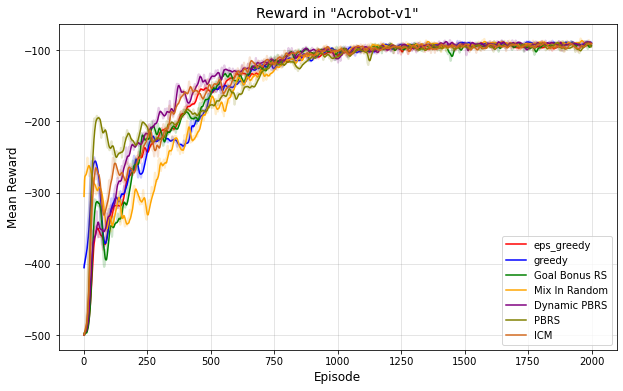

In [25]:
ax = plt.gca()

for i, avg in enumerate(data_to_plot):
    # smooth out rewards to get a smooth and a less smooth (var) plot lines
    avg['reward_smooth_' + str(i)] = avg['reward'].rolling(
        window=window_len_smooth, win_type='triang', min_periods=min_window_len_smooth).mean()
    avg['reward_var_' + str(i)] = avg['reward'].rolling(
        window=window_len_var, win_type='triang', min_periods=min_window_len_var).mean()

    # plot the lines
    avg.plot(kind='line', x='episode', y='reward_smooth_' + str(i), ax=ax,
             color=colors[i % len(colors)],  linewidth=linewidth_smooth, alpha=alpha_smooth)
    avg.plot(kind='line', x='episode', y='reward_var_' + str(i), ax=ax,
             color=colors[i % len(colors)],  linewidth=linewidth_var, alpha=alpha_var)
    #ax.fill_between(x='episode', y1=avg['reward_smooth_'+ str(i)] + avg['reward_var_' + str(i)], y2=avg['reward_smooth_'+ str(i)] - avg['reward_var_' + str(i)], facecolor=colors[i % len(colors)], linewidth=linewidth_var,alpha=alpha_var
    # )
handles, labels = ax.get_legend_handles_labels()
new_handles = []
new_labels = []
for i in range(len(handles)):
    if(i % 2 == 0):
        new_handles.append(handles[i])
        new_labels.append(labels[i])

for i, method in enumerate(training_method):
    new_labels[i] = training_method[i]

ax.legend(new_handles, new_labels, loc=4)

ax.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)

ax.set_xlabel("Episode", fontsize=12)
ax.set_ylabel("Mean Reward", fontsize=12)

plt.title(f'Reward in "{env_name}"', fontsize=14)

fig = plt.gcf()
fig.set_size_inches(fig_width, fig_height)

current_num_figs = next(os.walk(figures_dir))[2]
fig_num = len(current_num_figs)

fig_save_path = figures_dir + '/DQN_' + \
    env_name + '_plot_' + str(fig_num) + '_comparison' + '.png'
    
print("="*120)
plt.savefig(fig_save_path)
print("figure saved at : ", fig_save_path)

print("="*120)

plt.show()


figure saved at :  ../storage/DQN_comparison_plots/Acrobot-v1//DQN_Acrobot-v1_plot_11_comparison.png


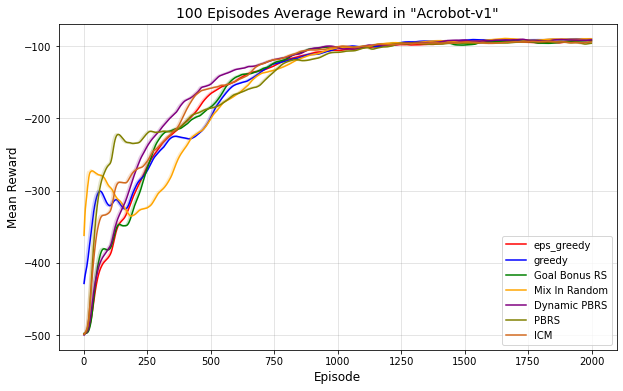

In [26]:
ax = plt.gca()

for i, avg in enumerate(data_to_plot):
    # smooth out rewards to get a smooth and a less smooth (var) plot lines
    avg['reward_smooth_' + str(i)] = avg['avg_reward'].rolling(
        window=window_len_smooth, win_type='triang', min_periods=min_window_len_smooth).mean()
    avg['reward_var_' + str(i)] = avg['avg_reward'].rolling(
        window=window_len_var, win_type='triang', min_periods=min_window_len_var).mean()

    # plot the lines
    avg.plot(kind='line', x='episode', y='reward_smooth_' + str(i), ax=ax,
             color=colors[i % len(colors)],  linewidth=linewidth_smooth, alpha=alpha_smooth)
    avg.plot(kind='line', x='episode', y='reward_var_' + str(i), ax=ax,
             color=colors[i % len(colors)],  linewidth=linewidth_var, alpha=alpha_var)
handles, labels = ax.get_legend_handles_labels()
new_handles = []
new_labels = []
for i in range(len(handles)):
    if(i % 2 == 0):
        new_handles.append(handles[i])
        new_labels.append(labels[i])

for i, method in enumerate(training_method):
    new_labels[i] = training_method[i]

ax.legend(new_handles, new_labels, loc=4)


ax.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)

ax.set_xlabel("Episode", fontsize=12)
ax.set_ylabel("Mean Reward", fontsize=12)

plt.title(f'100 Episodes Average Reward in "{env_name}"', fontsize=14)

fig = plt.gcf()
fig.set_size_inches(fig_width, fig_height)

current_num_figs = next(os.walk(figures_dir))[2]
fig_num = len(current_num_figs)

fig_save_path = figures_dir + '/DQN_' + \
    env_name + '_plot_' + str(fig_num) + '_comparison' + '.png'

print("="*120)
plt.savefig(fig_save_path)
print("figure saved at : ", fig_save_path)

print("="*120)
